5、实现手写数字图片识别将识别结果用matplotlib进行显示
6、实现人脸识别，使用PCA降维算法以及GridSearchCV，使用matplotlib进行结果显示

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
num = pd.read_csv('train.csv')
num

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X_data = num.iloc[:,1:]
y_data = num.iloc[:,0]

In [33]:
X_train = np.array(X_data).reshape(-1,784)
y_train = np.array(y_data)
display(X_train,y_train)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

array([1, 0, 1, ..., 7, 6, 9])

In [34]:
# 生成训练模型，对数据进行训练

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knnclf = KNeighborsClassifier(n_neighbors=10)

In [37]:
knnclf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [38]:
X_test =  num.iloc[-10:,1:]
X_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y_test = np.array(y_data)[-10:]
y_test

array([3, 1, 9, 6, 4, 0, 1, 7, 6, 9])

In [43]:
# 使用机器学习进行预测
y_predict = knnclf.predict(X_test)
y_predict

array([3, 1, 9, 6, 4, 0, 1, 7, 6, 9])

In [50]:
y_ = y_predict

In [41]:
knnclf.score(X_test,y_test)

1.0

In [47]:
y_names = np.array([0,1,2,3,4,5,6,7,8,9])

In [76]:
def titles(y_predict,y_test,y_names,i):
    
    t = y_test[i]
    p = y_predict[i]
    return "True:%d\npredict:%d"%(t,p)

In [77]:
predict_true_name = [titles(y_,y_test,y_names,i)  \
                     for i in range(y_test.size)]
predict_true_name

['True:3\npredict:3',
 'True:1\npredict:1',
 'True:9\npredict:9',
 'True:6\npredict:6',
 'True:4\npredict:4',
 'True:0\npredict:0',
 'True:1\npredict:1',
 'True:7\npredict:7',
 'True:6\npredict:6',
 'True:9\npredict:9']

In [83]:
def draw_picture(X_test,row,columns,titles):
#     plt.figure(figsize=(10,10))
    for i in range(row*columns):
        plt.subplot(row,columns,(i+1))
        plt.imshow(X_test[i].reshape((28,28)),cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

In [84]:
X_test.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

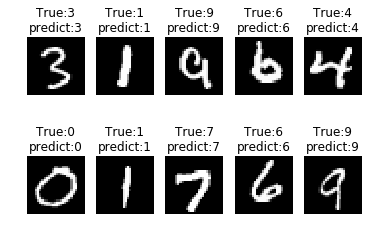

In [85]:
draw_picture(X_test.values,2,5,predict_true_name)

6、实现人脸识别，使用PCA降维算法以及GridSearchCV，使用matplotlib进行结果显示

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
import logging

from sklearn.svm import SVC

In [2]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')  

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=70,resize=1,
        slice_=(slice(0, 250, None), slice(0, 250, None)))

2017-09-22 16:26:20,962 Loading LFW people faces from /home/nanfengpo/scikit_learn_data/lfw_home


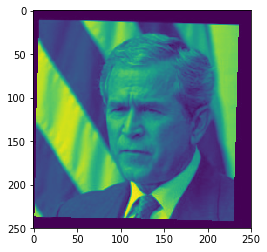

In [4]:
plt.imshow(lfw_people.images[17])

In [5]:
bush_img = lfw_people.data[10].reshape((250,250))

In [6]:
X_train = lfw_people.data
y_train = lfw_people.target

y_names = lfw_people.target_names

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,
                                                 test_size=0.12)

In [8]:
pca = PCA(n_components=300,whiten = True,svd_solver='randomized')

In [9]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

In [10]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [11]:
c = np.arange(1,10,2)
gamma = [0.0001,0.0005,0.001,0.002,0.2]
param_grid = {'C':c,'gamma':gamma}
svc = GridSearchCV(SVC(kernel='rbf',class_weight='balanced'),param_grid = param_grid)
clf = svc.fit(X_train_pca,y_train)

In [12]:
y_ = clf.predict(X_test_pca)

In [13]:
def titles(y_predict,y_true,y_names,i):
    
    t = y_names[y_true[i]].rsplit(' ')[-1]
    p = y_names[y_predict[i]].rsplit(' ')[-1]
    return "True:%s\npredict:%s"%(t,p)

In [14]:
predict_true_name = [titles(y_,y_test,y_names,i)  \
                     for i in range(y_test.size)]

In [15]:
def draw_picture(X_test,row,columns,titles):
    plt.figure(figsize=(10,30))
    for i in range(row*columns):
        plt.subplot(row,columns,(i+1))
        plt.imshow(X_test[i].reshape((250,250)),cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

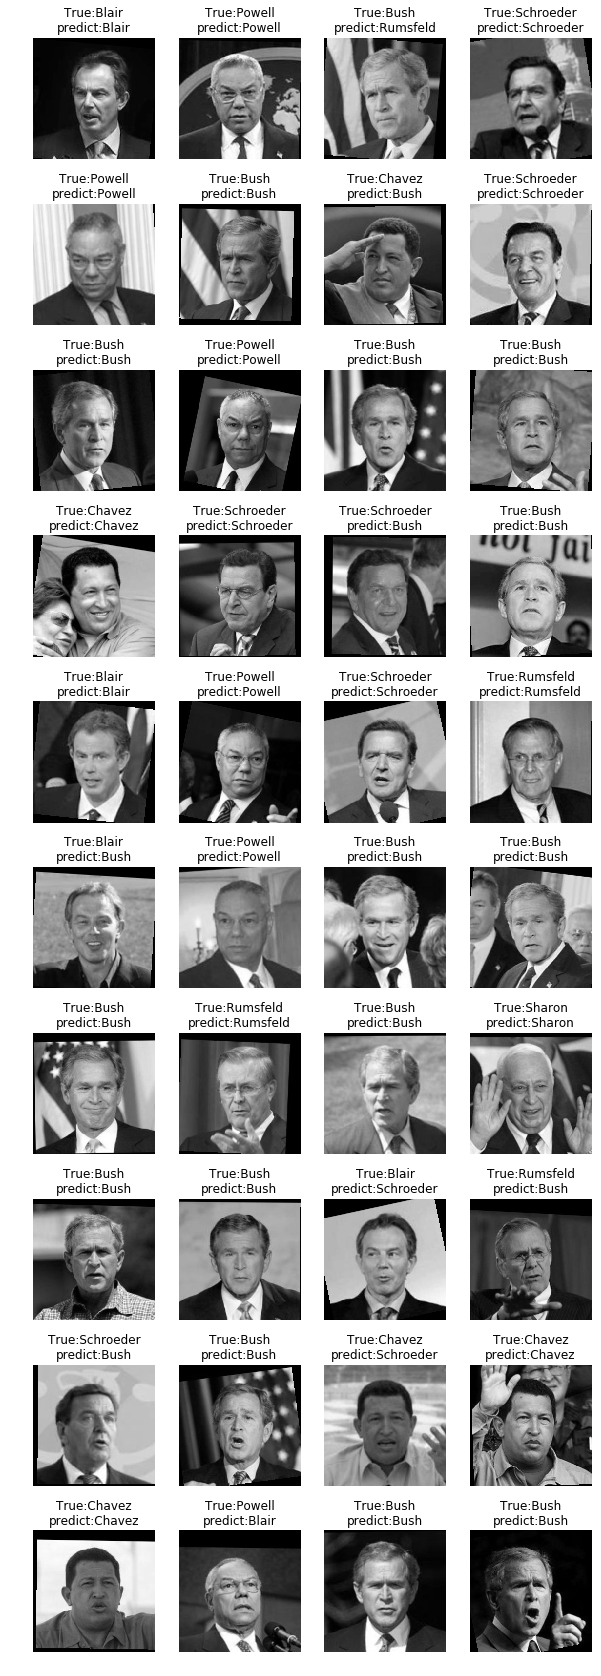

In [16]:
draw_picture(X_test,10,4,predict_true_name)